# Analyzing results
This notebook demonstrates how to compare results from looking at cross validation results.


In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
base_path = "../results/cv/"
experiments = ["f"+str(i) for i in range(1, 21)]

In [3]:
print('exp', 'highest_val_ridge_score', 'ndvi_ls', 'albedo_ls', sep='\t')
best_ndvi_vals = []
best_albedo_vals = []
for exp in experiments:
    df = pd.read_csv(os.path.join(base_path, exp, "results.csv"))
    df = df[df['iter'] > 5]
    table = pd.pivot_table(df, values='val_ridge_score', index=['ndvi_ls', 'albedo_ls'], aggfunc="mean")
    best_score = table['val_ridge_score'].max()
    best_ndvi_ls, best_albedo_ls = table[table['val_ridge_score'] == best_score].index[0]
    best_ndvi_vals.append(best_ndvi_ls)
    best_albedo_vals.append(best_albedo_ls)
    print(exp, best_score, best_ndvi_ls, best_albedo_ls, sep='\t')

exp	highest_val_ridge_score	ndvi_ls	albedo_ls
f1	0.3783795231838811	26	8
f2	0.3793911642348598	27	11
f3	0.3721442794576992	3	1
f4	0.3724360207131728	18	19
f5	0.37420249985449405	17	4
f6	0.3642662692197109	9	14
f7	0.32930877978331596	26	12
f8	0.37598993402138914	2	5
f9	0.3753834436409916	17	2
f10	0.3641995101751392	1	10
f11	0.32952715886695333	15	18
f12	0.37790358265426083	6	15
f13	0.37624339708256815	25	17
f14	0.36719249762322403	23	16
f15	0.3344790733658112	19	18
f16	0.38250977756866583	29	17
f17	0.3774418631746284	11	8
f18	0.3787257167490419	23	11
f19	0.36908677492062103	15	10
f20	0.3367891709104195	21	12


In [4]:
print('exp', 'highest_val_ridge_score', 'ndvi_ls', 'albedo_ls', sep='\t')
best_ndvi_vals = []
best_albedo_vals = []
for exp in experiments:
    df = pd.read_csv(os.path.join(base_path, exp, "results.csv"))
    df = df[df['iter'] > 5]
    table = pd.pivot_table(df, values='val_ridge_score', index=['ndvi_ls', 'albedo_ls'], aggfunc="max")
    best_score = table['val_ridge_score'].max()
    best_ndvi_ls, best_albedo_ls = table[table['val_ridge_score'] == best_score].index[0]
    best_ndvi_vals.append(best_ndvi_ls)
    best_albedo_vals.append(best_albedo_ls)
    print(exp, best_score, best_ndvi_ls, best_albedo_ls, sep='\t')

exp	highest_val_ridge_score	ndvi_ls	albedo_ls
f1	0.5892698651572632	21	18
f2	0.5734418266923105	20	1
f3	0.5870754726948909	2	13
f4	0.5873056161448151	20	1
f5	0.5855885390379845	14	4
f6	0.5749318052730743	10	19
f7	0.5552921173235357	10	8
f8	0.5888979377887423	2	19
f9	0.5844315171994364	20	9
f10	0.5773864606598408	19	16
f11	0.5562569145188374	27	18
f12	0.5598236165426553	2	5
f13	0.5555116723553042	11	16
f14	0.5494099187278656	29	16
f15	0.5376080987424451	26	2
f16	0.5787388695822164	1	12
f17	0.5805404469391384	25	2
f18	0.5725914514544741	12	16
f19	0.5712237495055991	22	1
f20	0.5511344425683977	19	8


We'll be using F1 as it has a high mean and max validation accuracy across all folds. We would also want to go with a lower L2-alpha hyperparameter to not decrease the weights by much.

## F1

In [10]:
df = pd.read_csv(os.path.join(base_path, "f1", "results.csv"))
df = df[df['iter'] > 5]

print(df['val_ridge_score'].max())
print(df['val_score'].max())

0.5892698651572632
0.8010185722556726


In [11]:
# Show average performance of each fold by creating a pivot table with average performance
table = pd.pivot_table(df, values='val_ridge_score', index=['fold'], aggfunc=[np.mean, np.std])
table

C:\Users\esl26\AppData\Local\Temp\ipykernel_33372\2709761217.py:2: FutureWarning: The provided callable <function mean at 0x000001BB75F42DE0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df, values='val_ridge_score', index=['fold'], aggfunc=[np.mean, np.std])
C:\Users\esl26\AppData\Local\Temp\ipykernel_33372\2709761217.py:2: FutureWarning: The provided callable <function std at 0x000001BB75F42F20> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  table = pd.pivot_table(df, values='val_ridge_score', index=['fold'], aggfunc=[np.mean, np.std])


,mean,std
,val_ridge_score,val_ridge_score
fold,,
0,0.155377,0.029683
1,0.354379,0.006600
2,0.436378,0.015877
3,0.284728,0.027606
4,0.536168,0.026038


In [12]:
res = pd.pivot_table(df, index=['ndvi_ls', 'albedo_ls'], values=['val_ridge_score'], aggfunc=np.mean)

C:\Users\esl26\AppData\Local\Temp\ipykernel_33372\2529061304.py:1: FutureWarning: The provided callable <function mean at 0x000001BB75F42DE0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  res = pd.pivot_table(df, index=['ndvi_ls', 'albedo_ls'], values=['val_ridge_score'], aggfunc=np.mean)


In [13]:
best_score = res['val_ridge_score'].max()
res[res['val_ridge_score'] == best_score].index[0]

(26, 8)

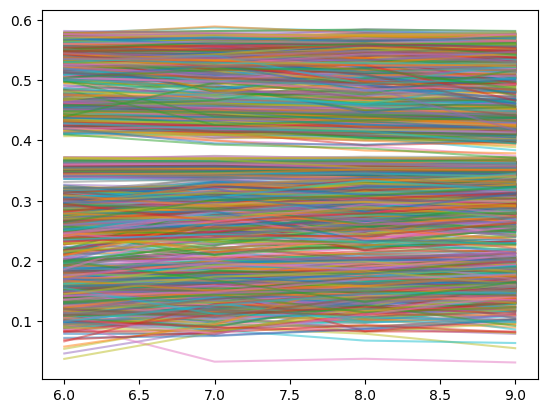

In [14]:
df_pivot = df.pivot_table(index=['fold', 'ndvi_ls', 'albedo_ls'], 
                          columns='iter', 
                          values='val_ridge_score')

# Plot each row
for i in range(len(df_pivot)):
    plt.plot(df_pivot.iloc[i], alpha=0.5)

C:\Users\esl26\AppData\Local\Temp\ipykernel_33372\1397576255.py:1: FutureWarning: The provided callable <function mean at 0x000001BB75F42DE0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data = pd.pivot_table(df, index=['ndvi_ls'], columns=['albedo_ls'], values=['val_ridge_score'],aggfunc=np.mean)


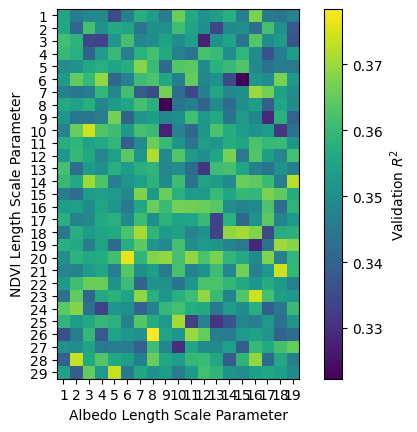

In [15]:
data = pd.pivot_table(df, index=['ndvi_ls'], columns=['albedo_ls'], values=['val_ridge_score'],aggfunc=np.mean)
plt.imshow(data.values)
plt.xticks(range(0, 19), labels=range(1,20))
plt.yticks(range(0, 29),labels=range(1, 30))
plt.xlabel("Albedo Length Scale Parameter")
plt.ylabel("NDVI Length Scale Parameter")
plt.colorbar(label='Validation $R^2$')

<Axes: xlabel='albedo_ls'>

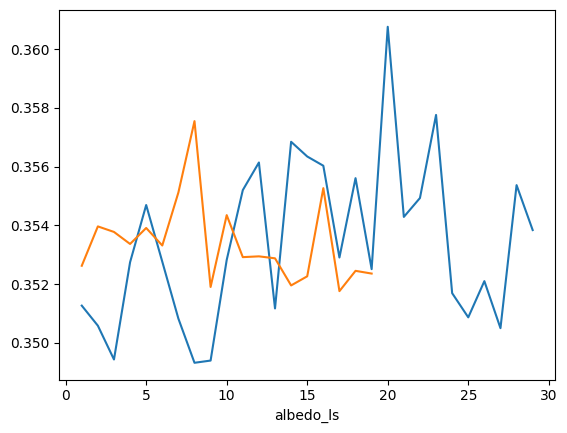

In [16]:
df.groupby('ndvi_ls')['val_ridge_score'].mean().plot()
df.groupby('albedo_ls')['val_ridge_score'].mean().plot()
